# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1 yes
2 No
3 yes
4 No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I will split data into two parts: testing and training data. Training data is for learning a model. Testing data is used to get an idea of how the model might perform.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting: When the model is too simple to capture the pattern of the data. 

Sign: high testing and training error

Overfitting: When the model is too complex that catches noises or fluctuation rather than the true underlying pattern.Match the data in a too detailed so that it cannot have a general idea of how the relation looks like.

Sign: high testing error, low training error

### K Nearest Neighbors

In [25]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

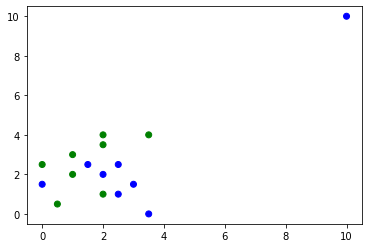

In [7]:
colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot the data points based on class
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

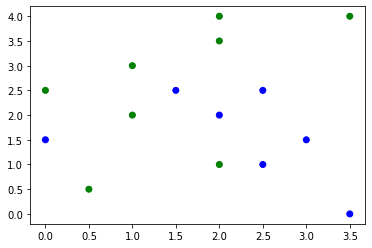

In [11]:
import scipy.stats as stats

# Calculate Z-scores for each data point in both attributes
z_scores_a = np.abs(stats.zscore(data["Attribute A"]))
z_scores_b = np.abs(stats.zscore(data["Attribute B"]))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Find the indices of the outliers
outliers = np.where((z_scores_a > threshold) | (z_scores_b > threshold))

# Remove the outliers from the dataset
for key in data:
    data[key] = [data[key][i] for i in range(len(data[key])) if i not in outliers[0]]

# Plot the cleaned dataset
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

(0, 1.5)

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

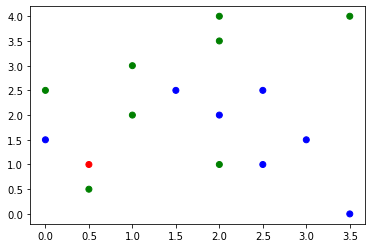

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

# Calculate Z-scores for each data point in both attributes
z_scores_a = np.abs(stats.zscore(data["Attribute A"]))
z_scores_b = np.abs(stats.zscore(data["Attribute B"]))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Find the indices of the outliers
outliers = np.where((z_scores_a > threshold) | (z_scores_b > threshold))

# Remove the outliers from the dataset
for key in data:
    data[key] = [data[key][i] for i in range(len(data[key])) if i not in outliers[0]]

# Add the point (0.5, 1) to the dataset
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)  # Assign a unique class value (e.g., 2) to distinguish the new point

# Plot the cleaned dataset with the new point in a different color
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

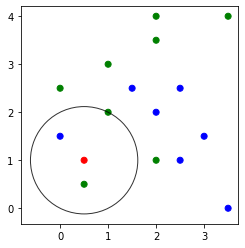

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def n_closest_to(example, n, data):
    distances = [euclidean(example, (data["Attribute A"][i], data["Attribute B"][i])) for i in range(len(data["Attribute A"]))]
    closest_indices = np.argsort(distances)[:n+1] # exclude itself
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i]) for i in closest_indices]
    return closest_points

# Assuming you have the point's coordinates as a tuple
location = (0.5, 1)

# Calculate the Euclidean distances and get the 3 closest points
n = 3
closest_points = n_closest_to(location, n, data)

# Find the distance to the farthest of the 3 closest points
farthest_distance = max([euclidean(location, point) for point in closest_points])

# Create a scatter plot of the dataset
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())

# Draw a circle centered around the point with the radius of the farthest of the 3 closest points
cir = plt.Circle(location, farthest_distance, fill=False, alpha=0.8)
plt.gca().add_patch(cir)

plt.gca().set_aspect('equal')  # Necessary so that the circle is not an oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [15]:
import numpy as np

def majority_class(closest_points, data, default_class):
    # Get the classes of the closest points
    classes = [data["Class"][data["Attribute A"].index(point[0])] for point in closest_points]

    # Count the occurrences of each class
    class_counts = {0: 0, 1: 0}

    for c in classes:
        class_counts[c] += 1

    # Determine the majority class, breaking ties with the default class
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        return default_class

# Assuming you have already calculated closest_points
default_class = 0  # You can choose a default class of your preference
assigned_class = majority_class(closest_points, data, default_class)
print("Assigned Class:", assigned_class)


Assigned Class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [27]:
import numpy as np

def leave_one_out_cross_validation(data, default_class=0):
    correct_counter = 0

    for i in range(len(data["Attribute A"])):
        test_point = (data["Attribute A"][i], data["Attribute B"][i])
        train_data = {"Attribute A": [], "Attribute B": [], "Class": []}

        for j in range(len(data["Attribute A"])):
            if i != j:
                train_data["Attribute A"].append(data["Attribute A"][j])
                train_data["Attribute B"].append(data["Attribute B"][j])
                train_data["Class"].append(data["Class"][j])

        closest_points = n_closest_to(test_point, 3, train_data)
        assigned_class = majority_class(closest_points, train_data, default_class)

        if assigned_class == data["Class"][i]:
            correct_counter += 1

    testing_accuracy = correct_counter / len(data["Attribute A"])
    return testing_accuracy

# Testing the LOOCV function and printing the testing accuracy
testing_accuracy = leave_one_out_cross_validation(data)
print("Testing Accuracy:", testing_accuracy)


Testing Accuracy: 0.5625
